# Final Project

In [1]:
import pandas as pd
import numpy as np

import spacy
import nltk

from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.decomposition import NMF
from sklearn.decomposition import LatentDirichletAllocation

In [2]:
nlp = spacy.load('en_core_web_sm')

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\muggs\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## EDA before preprocessing
### Import data

In [3]:
train_df = pd.read_csv('train.csv')
train_df.shape

(19579, 3)

In [4]:
train_df.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [5]:
test_df = pd.read_csv('test.csv')
test_df.shape

(8392, 2)

### Most common words

<AxesSubplot:>

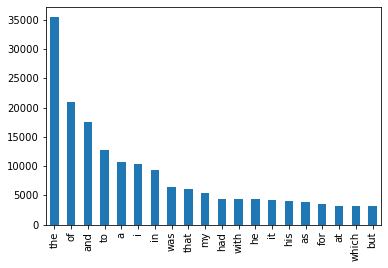

In [6]:
pd.Series(' '.join(train_df['text']).lower().split()).value_counts()[:20].plot(kind='bar')

### Number of documents per author

<AxesSubplot:>

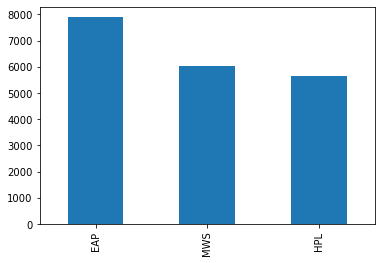

In [7]:
train_df['author'].value_counts().plot(kind='bar')

In [8]:
train = train_df.values.tolist()



test = test_df.values.tolist()

train[0][1]

'This process, however, afforded me no means of ascertaining the dimensions of my dungeon; as I might make its circuit, and return to the point whence I set out, without being aware of the fact; so perfectly uniform seemed the wall.'

### Average number of tokens per document

In [9]:
docs = []
num_tokens = 0
for doc in train:
    d = nlp(str(doc[1]))
    num_tokens += len(d)
    
    docs.append(d)
    
avg_tokens = num_tokens / len(docs)
avg_tokens

30.39930537821135

## Preprocessing

### Convert to lowercase

In [10]:
train = np.char.lower(train)



test = np.char.lower(test)

### Remove symbols

In [11]:
symbols = "!\"#$%&()*+-./:;<=>?@[\]^_`{|}~\n\t',"

for s in symbols:
    train = np.char.replace(train, s, '')
    
    
    
    test = np.char.replace(test, s, '')

In [12]:
train[0][1]

'this process however afforded me no means of ascertaining the dimensions of my dungeon as i might make its circuit and return to the point whence i set out without being aware of the fact so perfectly uniform seemed the wall'

In [13]:
docs = []

for doc in train:
    docs.append(nlp(str(doc[1])))
    
    
    
docs_test = []

for doc in test:
    docs_test.append(nlp(str(doc[1])))

### Remove stopwords

In [14]:
remove_sw = []

for doc in docs:
    new = ''
    for token in doc:
        if token.text not in set(stopwords.words('english')) and len(token.text) > 1:
            new = new + ' ' + token.text
            
    remove_sw.append(new)
    
# clear up memory
del docs



remove_sw_test = []

for doc in docs_test:
    new = ''
    for token in doc:
        if token.text not in set(stopwords.words('english')) and len(token.text) > 1:
            new = new + ' ' + token.text
            
    remove_sw_test.append(new)
    
# clear up memory
del docs_test

### Lemmatization

In [15]:
docs = []
for doc in remove_sw:
    docs.append(nlp(str(doc)))
    
    
    
docs_test = []
for doc in remove_sw_test:
    docs_test.append(nlp(str(doc)))

In [16]:
lemmas = []

for doc in docs:
    new = ''
    for token in doc:
        new = new + ' ' + token.lemma_
        
    lemmas.append(new)
    
    
    
lemmas_test = []

for doc in docs_test:
    new = ''
    for token in doc:
        new = new + ' ' + token.lemma_
            
    lemmas_test.append(new)

In [17]:
# clear up memory
del remove_sw
del docs

del remove_sw_test
del docs_test

### Vectorization

In [18]:
tfidf_vectorizer = TfidfVectorizer(min_df=0.001, max_df=1.0)

tfidf = tfidf_vectorizer.fit_transform(lemmas)
tfidf_df = pd.DataFrame(tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())



tfidf_test = tfidf_vectorizer.transform(lemmas_test)
tfidf_test_df = pd.DataFrame(tfidf_test.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [19]:
tfidf_df.shape

(19579, 2365)

In [20]:
tf_vectorizer = CountVectorizer()

tf = tf_vectorizer.fit_transform(lemmas)
tf_df = pd.DataFrame(tf.toarray(), columns=tf_vectorizer.get_feature_names_out())



tf_test = tf_vectorizer.transform(lemmas_test)
tf_test_df = pd.DataFrame(tf_test.toarray(), columns=tf_vectorizer.get_feature_names_out())

## EDA after preprocessing

<AxesSubplot:>

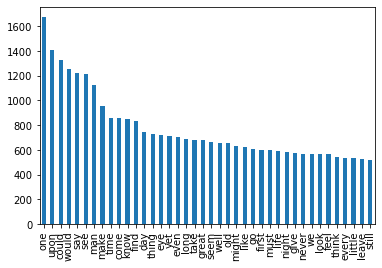

In [21]:
pd.Series(' '.join(pd.DataFrame(lemmas)[0]).lower().split()).value_counts()[:40].plot(kind='bar')

## Topic Modelling
### Non-Negative Matrix Factorization

In [34]:
nmf_model = NMF(n_components=10)
nmf_model.fit_transform(tfidf_df)

C:\Users\muggs\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


array([[0.03231338, 0.        , 0.        , ..., 0.00421456, 0.00045305,
        0.        ],
       [0.01424641, 0.00030146, 0.01362186, ..., 0.00229094, 0.        ,
        0.        ],
       [0.03100735, 0.00057326, 0.        , ..., 0.        , 0.00575194,
        0.        ],
       ...,
       [0.        , 0.14742115, 0.02334135, ..., 0.00241737, 0.        ,
        0.00187623],
       [0.02582922, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.01239341, 0.        , 0.        , ..., 0.        , 0.00248844,
        0.        ]])

In [35]:
nmf_results = nmf_model.transform(tfidf_test_df)

#### Top 15 words of each topic

In [36]:
tn = None

for i, topic in enumerate(nmf_model.components_):
    print("\nTopic ", i, '\n', ", ".join([tfidf_vectorizer.get_feature_names()[i] for i in topic.argsort()[-15:]]))


Topic  0 
 feel, leave, give, life, even, first, day, we, seem, take, long, yet, find, make, time

Topic  1 
 mean, go, must, dear, sir, let, well, not, much, may, nothing, dupin, shall, little, say

Topic  2 
 water, stand, dark, like, tree, thing, light, not, face, ever, hear, eye, look, never, see

Topic  3 
 house, tell, foot, reply, small, might, voice, old, side, night, thing, every, two, another, one

Topic  4 
 wish, raymond, case, even, follow, alone, not, go, never, might, hope, well, return, think, would

Topic  5 
 believe, never, whether, want, god, think, though, world, nothing, tell, must, not, thing, well, know

Topic  6 
 woman, good, animal, look, dead, dream, face, thing, tell, live, god, great, young, old, man

Topic  7 
 thing, doubt, human, scarcely, do, understand, perceive, distinguish, believe, even, help, tell, word, nothing, could

Topic  8 
 turn, arm, table, foot, thus, subject, lie, sit, throw, eye, head, fall, hand, look, upon

Topic  9 
 hear, home, sle

C:\Users\muggs\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### Latent Dirichlet Allocation

In [25]:
lda_model = LatentDirichletAllocation()

lda_model.fit_transform(tf_df)

array([[0.00454695, 0.0045472 , 0.00454701, ..., 0.0045473 , 0.47900525,
        0.48461803],
       [0.01428868, 0.57441969, 0.01428736, ..., 0.31126856, 0.01428704,
        0.01428914],
       [0.00500108, 0.0050011 , 0.00500223, ..., 0.95498631, 0.00500174,
        0.00500188],
       ...,
       [0.01000522, 0.01000242, 0.01000109, ..., 0.01000319, 0.90996834,
        0.01000577],
       [0.01250536, 0.01250663, 0.01250752, ..., 0.01250194, 0.01250281,
        0.01250406],
       [0.01111323, 0.01111327, 0.27305026, ..., 0.47395868, 0.01111398,
        0.01111521]])

#### Top 15 words of each topic

In [26]:
tn = None

for i, topic in enumerate(lda_model.components_):
    print("\nTopic ", i, '\n', ", ".join([tf_vectorizer.get_feature_names()[i] for i in topic.argsort()[-15:]]))

C:\Users\muggs\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)



Topic  0 
 time, return, death, long, day, raymond, life, shall, hope, feel, yet, upon, love, heart, would

Topic  1 
 first, give, earth, might, take, make, love, eye, great, we, thing, find, see, one, say

Topic  2 
 one, hand, fall, every, see, could, become, open, light, window, make, room, we, door, upon

Topic  3 
 time, hear, nothing, still, old, look, great, point, seem, like, man, voice, one, say, upon

Topic  4 
 leave, hear, man, old, never, like, could, say, see, one, know, tell, thing, come, not

Topic  5 
 seem, time, thing, yet, look, moon, light, man, dream, upon, hear, great, even, could, see

Topic  6 
 say, make, might, back, must, come, find, old, know, go, see, house, could, one, man

Topic  7 
 seem, thousand, hour, may, time, might, even, life, year, upon, make, one, man, would, day

Topic  8 
 long, great, say, body, three, get, two, find, one, could, know, well, street, make, would

Topic  9 
 tear, time, take, night, like, first, even, never, say, long, hand,

In [27]:
lda_results = lda_model.transform(tf_test_df)

## Results
### Sample documents from test set

In [28]:
test_df['text'][0]

'Still, as I urged our leaving Ireland with such inquietude and impatience, my father thought it best to yield.'

In [29]:
test_df['text'][4]

'I am not sure to what limit his knowledge may extend.'

### NMF

In [37]:
nmf_results[0].argmax()

0

In [38]:
nmf_results[4].argmax()

0

### LDA

In [32]:
lda_results[0].argmax()

0

In [33]:
lda_results[4].argmax()

7

### The non-negative matrix factorization predicted both test document 1 and 5 to belong to topic 0 which consisted of words like: 
##### feel, leave, give, life, even, first, day, we, seem, take, long, yet, find, make, and time.
### NMF factorization did not perform adequately because the words of topic 0 only loosely correlate to the content of the test documents. Further experimentation revealed about half of the documents were predicted to belong to topic 0. NMF modeled information in such a way that it favors topic 0.

### The Latent Dirichlet Allocation classified test document 1 as belonging to topic 9 and test document 5 as belonging to topic 2 which respectively consisted of words like:
###### Topic 2: come, may, little, make, de, time, find, must, man, well, would, much, matter, know, say
###### Topic 9:  love, make, give, visit, day, friend, take, return, first, house, father, old, one, life, could
### LDA did well at classifying both documents because the words which describe each topic resemble the content of the respective documents.

## Conclusion:
### LDA outperformed NMF for topic modeling, assigning topics to test documents that felt similar intuitively.